In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

In [2]:
# loading the dataset
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Handling Missing Values

In [5]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [6]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values =np.NaN,strategy='median')
imputer.fit(df)
x = imputer.transform(df)

In [8]:
df_new = pd.DataFrame(x,columns=df.columns)

In [9]:
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


### Looking for Correlations

In [11]:
corr_matrix=df_new.corr()

In [12]:
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


In [13]:
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64

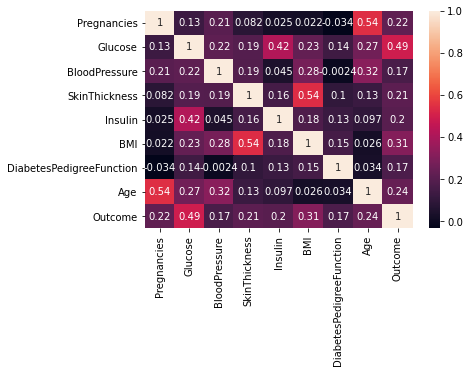

In [14]:
sns.heatmap(corr_matrix,annot=True)

### Visualization


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C98A6B088>,
      dtype=object)

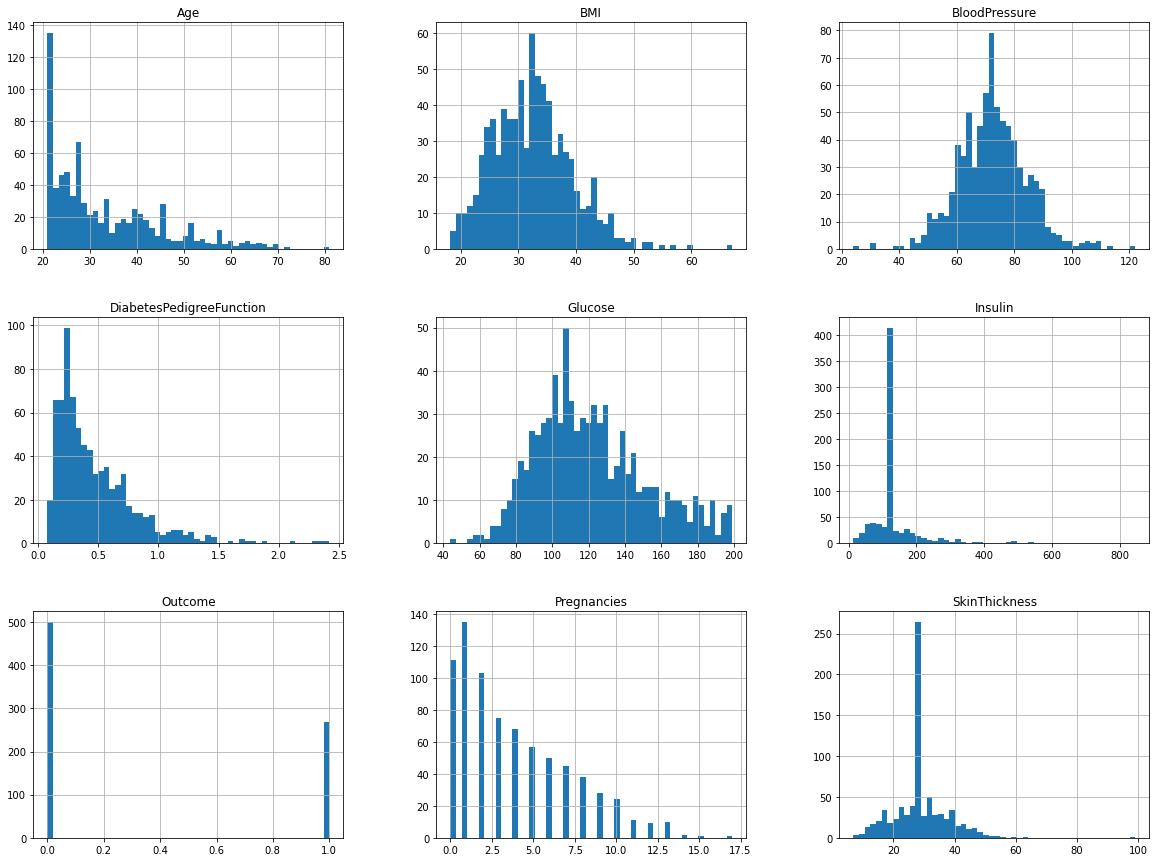

In [15]:
df_new.hist(bins=50,figsize=(20,15))

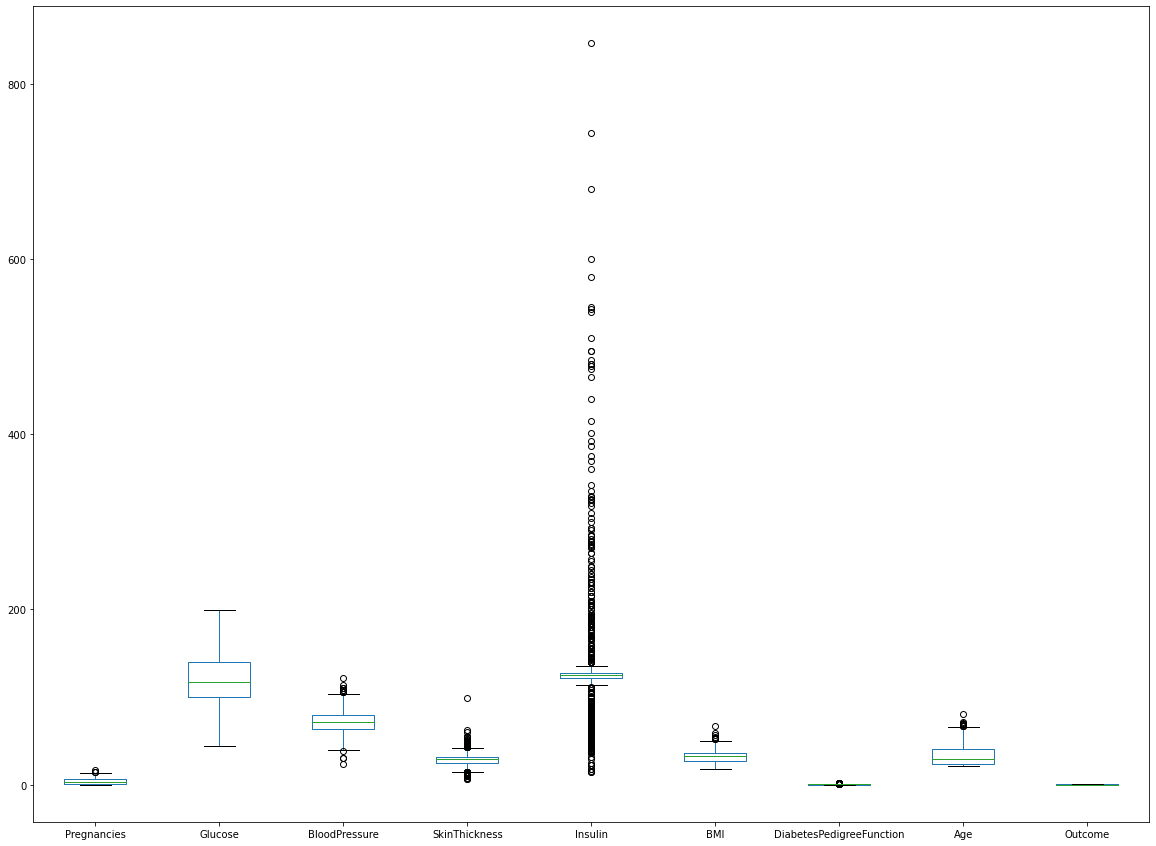

In [16]:
df_new.plot(kind='box',figsize=(20,15))

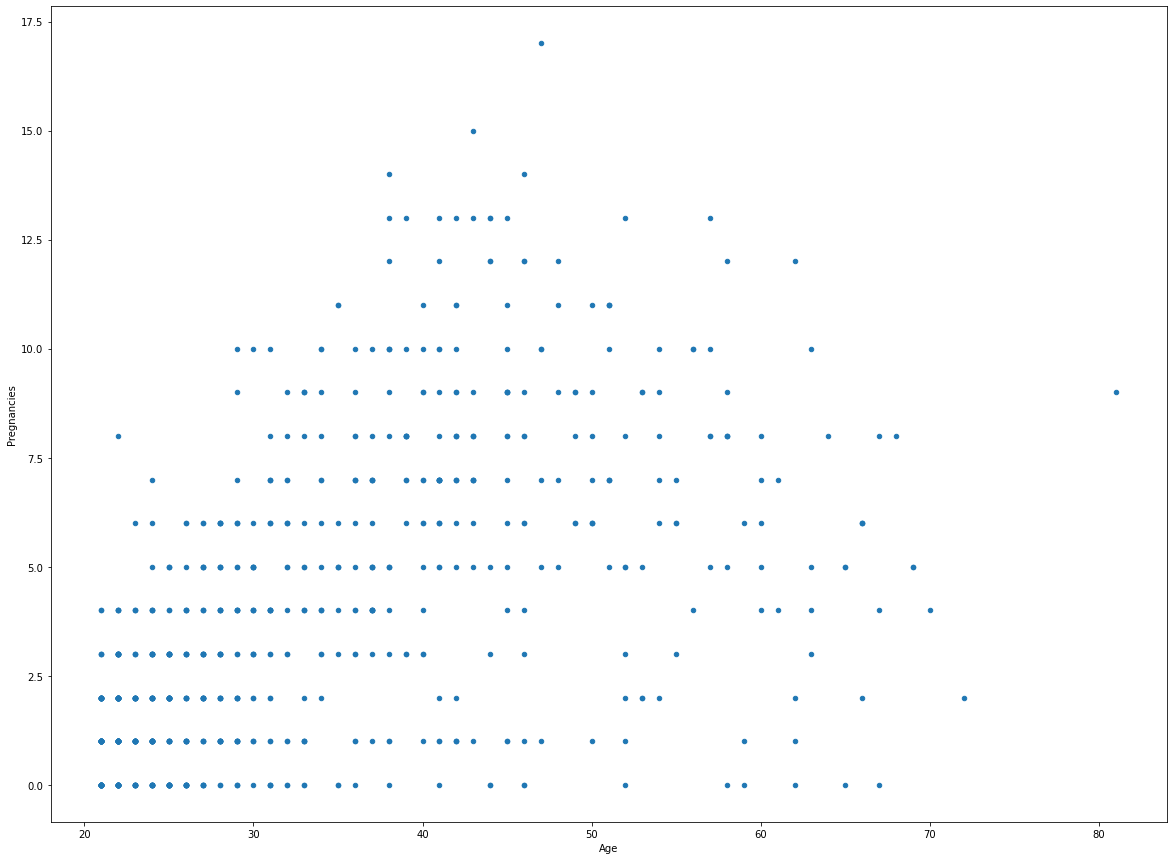

In [17]:
df_new.plot(kind='scatter',y='Pregnancies',x='Age',figsize=(20,15))

### Splitting the Data

In [18]:
X = df_new.iloc[:,:-1].values
Y = df_new.iloc[:,-1].values

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [20]:
# import all the algorithm we want to test
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [21]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTR', DecisionTreeClassifier()))

In [22]:
from sklearn.model_selection import KFold,cross_val_score
names = []
results = []

for name,model in models:
    kfold = KFold(n_splits=10,random_state=7)
    cv_results = cross_val_score(model,X,Y,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (
        name, cv_results.mean(), cv_results.std()
    )
    print(msg)

LR: 0.766934 (0.050422)
KNN: 0.716097 (0.056521)
NB: 0.748701 (0.043830)
SVC: 0.760458 (0.055295)
RFC: 0.766832 (0.059581)
DTR: 0.704357 (0.062365)


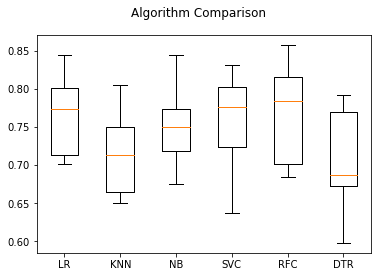

In [23]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### It looks like that using this comparison method, the most performant algorithm is NB.

In [25]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [26]:
filename = 'model.pkl'
pickle.dump(model,open(filename, 'wb'))

In [27]:
pred = model.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test,pred)
print(cm)

[[79 20]
 [18 37]]


In [31]:
accuracy_score(Y_test,pred)

0.7532467532467533